0.09748202757762411
0.08989932962427429
0.05579924478386267
0.11833551836111025
0.08657485699115458
0.175504045715307
0.09304004480261964
0.0666260051797589
0.12819558927783037
0.09543204868333091
0.082813030565318
0.08746888643865022
0.09225105407400093
0.06912549254169142
0.10428283756211344
0.08001729860855494


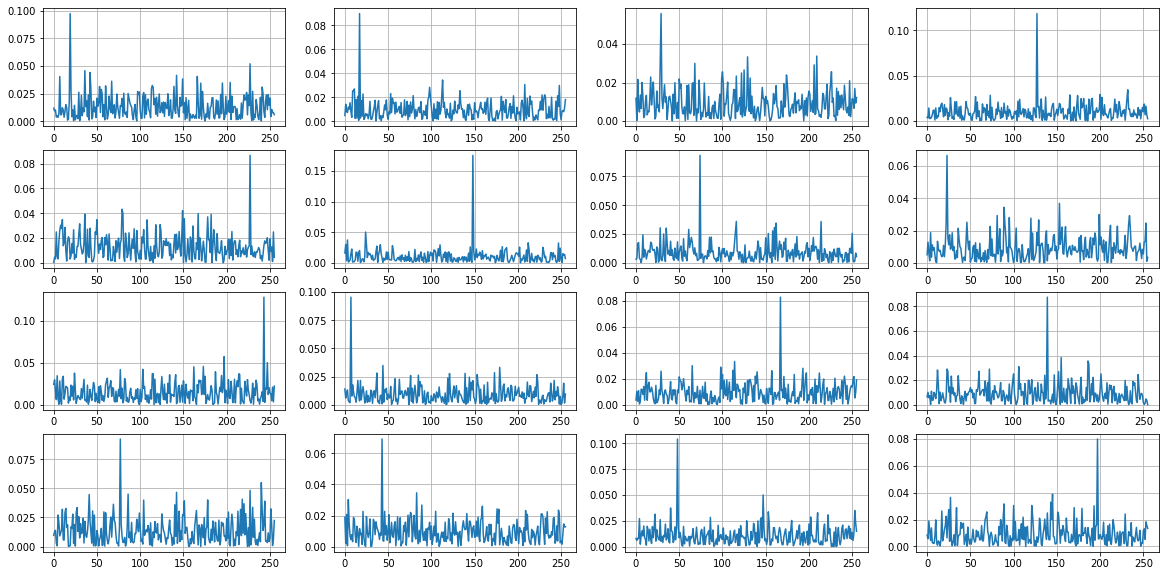

[19, 17, 29, 127, 227, 148, 74, 23, 243, 7, 167, 139, 77, 43, 48, 197]

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
indexmap = [0,5, 10, 15, 4 , 9 , 14 , 3 ,8 , 13, 2, 7, 12, 1, 6, 11]
sbox_inv = np.array([
    0x52, 0x09, 0x6A, 0xD5, 0x30, 0x36, 0xA5, 0x38, 0xBF, 0x40, 0xA3, 0x9E, 0x81, 0xF3, 0xD7, 0xFB,
    0x7C, 0xE3, 0x39, 0x82, 0x9B, 0x2F, 0xFF, 0x87, 0x34, 0x8E, 0x43, 0x44, 0xC4, 0xDE, 0xE9, 0xCB,
    0x54, 0x7B, 0x94, 0x32, 0xA6, 0xC2, 0x23, 0x3D, 0xEE, 0x4C, 0x95, 0x0B, 0x42, 0xFA, 0xC3, 0x4E,
    0x08, 0x2E, 0xA1, 0x66, 0x28, 0xD9, 0x24, 0xB2, 0x76, 0x5B, 0xA2, 0x49, 0x6D, 0x8B, 0xD1, 0x25,
    0x72, 0xF8, 0xF6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xD4, 0xA4, 0x5C, 0xCC, 0x5D, 0x65, 0xB6, 0x92,
    0x6C, 0x70, 0x48, 0x50, 0xFD, 0xED, 0xB9, 0xDA, 0x5E, 0x15, 0x46, 0x57, 0xA7, 0x8D, 0x9D, 0x84,
    0x90, 0xD8, 0xAB, 0x00, 0x8C, 0xBC, 0xD3, 0x0A, 0xF7, 0xE4, 0x58, 0x05, 0xB8, 0xB3, 0x45, 0x06,
    0xD0, 0x2C, 0x1E, 0x8F, 0xCA, 0x3F, 0x0F, 0x02, 0xC1, 0xAF, 0xBD, 0x03, 0x01, 0x13, 0x8A, 0x6B,
    0x3A, 0x91, 0x11, 0x41, 0x4F, 0x67, 0xDC, 0xEA, 0x97, 0xF2, 0xCF, 0xCE, 0xF0, 0xB4, 0xE6, 0x73,
    0x96, 0xAC, 0x74, 0x22, 0xE7, 0xAD, 0x35, 0x85, 0xE2, 0xF9, 0x37, 0xE8, 0x1C, 0x75, 0xDF, 0x6E,
    0x47, 0xF1, 0x1A, 0x71, 0x1D, 0x29, 0xC5, 0x89, 0x6F, 0xB7, 0x62, 0x0E, 0xAA, 0x18, 0xBE, 0x1B,
    0xFC, 0x56, 0x3E, 0x4B, 0xC6, 0xD2, 0x79, 0x20, 0x9A, 0xDB, 0xC0, 0xFE, 0x78, 0xCD, 0x5A, 0xF4,
    0x1F, 0xDD, 0xA8, 0x33, 0x88, 0x07, 0xC7, 0x31, 0xB1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xEC, 0x5F,
    0x60, 0x51, 0x7F, 0xA9, 0x19, 0xB5, 0x4A, 0x0D, 0x2D, 0xE5, 0x7A, 0x9F, 0x93, 0xC9, 0x9C, 0xEF,
    0xA0, 0xE0, 0x3B, 0x4D, 0xAE, 0x2A, 0xF5, 0xB0, 0xC8, 0xEB, 0xBB, 0x3C, 0x83, 0x53, 0x99, 0x61,
    0x17, 0x2B, 0x04, 0x7E, 0xBA, 0x77, 0xD6, 0x26, 0xE1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0C, 0x7D
], dtype=np.uint8)
ciphers = []
def countSetBits(num): 
  
    # convert given number into binary 
    # output will be like bin(11)=0b1101 
    binary = bin(num) 

    # now separate out all 1's from binary string 
    # we need to skip starting two characters 
    # of binary string i.e; 0b 
    setBits = [ones for ones in binary[2:] if ones=='1'] 
       
    return len(setBits)
    
with open("/Users/vamshi/Downloads/handout/data/ciphers.txt") as f:
    line = f.readline()
    while(line):
        ciphers.append(line.rstrip("\n").split(" "))
        line = f.readline()

power = []
with open("/Users/vamshi/Downloads/handout/data/traces.txt") as f:
    line = f.readline()
    i = 0
    while(line):
        power.append(int(line.split(" ")[2662]))
        i += 1
        line = f.readline()
        
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
final_key = []
for kj in range(16):
    ki = indexmap[kj]
    corr_r = []
    for g in range(256):
        result = []
        for i in range(7000):
            a = int(ciphers[i][kj])
            x = int(ciphers[i][ki])
            b = a^g
            #print( "%s ^ %s ist %s"%(a, g, b))
            c = b ^ x
            #print("%s ^ %s is %s"%(b, x, c))
            int_value = sbox_inv[(int(ciphers[i][kj]) ^ g)] ^  int(ciphers[i][ki])
            
            result.append(countSetBits(int_value))
        #print(result)
        corr, _ = pearsonr(result, power)
        corr_r.append(abs(corr))
    #print(corr_r)
    plt.subplot(4,4, kj+1)
    plt.plot(corr_r)
    plt.grid(True)
    print(max(corr_r))
    final_key.append(corr_r.index(max(corr_r)))
plt.show()
final_key